# T1-2

Responda ás questões elencadas abaixo utilizando a linguagem de programação Python e as bibliotecas Pandas, Matplotlib e Seaborn.

Este trabalho consiste em realizar uma análise sobre dados de ocorrências de acidentes de trânsito, ocorridos no ano de 2018.

A fonte dos dados e especificações podem ser consultados no portal da Polícia Rodoviária Federal, disponível [aqui](https://portal.prf.gov.br/dados-abertos).

**Dicas**
- Assim como nos DataFrames, nas Series tamém é possível utilizar a função `.head()`.
- A função `.value_counts()` retorna os valores ordenados por quantidade, em ordem decrescente.
- Com a função `.value_counts()` também é possível gerar gráficos, p.ex. `.value_counts().plot()` ou `.value_counts().plot.bar()`.

In [ ]:
print('ok')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
########################
#Leitura da base no diretório local (Jupyter)
########################
df = pd.read_csv('./bases/datatran2018.csv', sep=';', encoding='latin-1') # Carrega a base

########################
#Leitura da base no Google Drive (Colaboratory)
########################
# from google.colab import drive
# drive.mount('/drive') #monta a base no google drive
# database_path = '/drive/Shareddrives/BasesPublicas/Bases/PRF/datatran2018.csv' #caminho da base de dados
# df = pd.read_csv(database_path, sep=';', encoding='latin-1') #Carrega a base

In [5]:
df.head() #Observa as primeiras linhas da base

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,99973.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,...,4,1,0,4,1,"-22,46937","-44,44705",SR-RJ,DEL5/7,UOP03/RJ
1,99976.0,2018-01-01,segunda-feira,00:40:00,SC,282.0,"0,4",FLORIANOPOLIS,Não guardar distância de segurança,Colisão traseira,...,2,1,0,2,2,"-27,59971687","-48,57565694",SR-SC,DEL8/1,UOP01/SC
2,99977.0,2018-01-01,segunda-feira,00:30:00,RJ,493.0,1,ITABORAI,Ultrapassagem Indevida,Colisão frontal,...,0,3,1,1,3,"-22,763901","-42,927532",SR-RJ,DEL5/4,UOP02/RJ
3,99981.0,2018-01-01,segunda-feira,01:15:00,RS,386.0,134,SARANDI,Ingestão de Álcool,Colisão transversal,...,0,2,0,0,2,"-27,953636","-52,916374",SR-RS,DEL9/14,UOP01/RS
4,99982.0,2018-01-01,segunda-feira,00:20:00,RS,293.0,"151,7",CANDIOTA,Falta de Atenção à Condução,Saída de leito carroçável,...,1,0,0,1,1,"-31,395214","-53,78391174",SR-RS,DEL9/11,UOP03/RS


**Item 01**  
- Qual é o estado que mais teve o manior número de acidentes?

In [11]:
estados = df['uf'].value_counts()
estados[ estados == estados.max() ]

MG    9066
Name: uf, dtype: int64

**Item 02**  
- Apresente a quantidade de acidentes por dia da semana.

In [12]:
df['dia_semana'].value_counts()

domingo          11283
sábado           11239
sexta-feira      10632
segunda-feira     9422
quinta-feira      9230
quarta-feira      8824
terça-feira       8665
Name: dia_semana, dtype: int64

**Item 03**  
- Apresente a quantidade de acidentes por estado.

In [14]:
df['uf'].value_counts()

MG    9066
SC    8497
PR    7952
RJ    4575
SP    4516
RS    4445
BA    3555
GO    3464
PE    2715
ES    2642
MT    2631
CE    1697
RO    1629
PB    1588
MS    1530
RN    1416
PI    1371
MA    1272
PA    1260
DF     867
AL     691
TO     589
SE     559
RR     236
AC     235
AP     173
AM     124
Name: uf, dtype: int64

**Item 04**  
- De acordo com a quantidade de acidentes, quais são as 5 rodovias mais perigosas?

In [18]:
df['br'].value_counts().head(5)

101.0    11212
116.0     9972
381.0     3550
40.0      3220
153.0     2834
Name: br, dtype: int64

**Item 05**  
- Considerando apenas acidentes com vítimas fatais, qual rodovia é a mais perigosa?

In [24]:
df_tmp = df[df['mortos']>0]
df_tmp['br'].value_counts().head(1)

116.0    582
Name: br, dtype: int64

**Item 06**  
- No Paraná, quais são as 10 cidades do interior que possuiram o maior número de acidentes?

In [29]:
df_tmp = df[df['uf']=='PR']
df_tmp = df_tmp[df_tmp['municipio']!= 'CURITIBA']
df_tmp['municipio'].value_counts().head(10)

SAO JOSE DOS PINHAIS     448
MARINGA                  443
CASCAVEL                 338
FOZ DO IGUACU            299
CAMPINA GRANDE DO SUL    285
PONTA GROSSA             268
PARANAGUA                178
APUCARANA                156
CAMPO LARGO              153
TIJUCAS DO SUL           152
Name: municipio, dtype: int64

**Item 07**  
- Os acidentes com vítimas fatais ocorrem em sua maioria em trechos de curvas ou de reta? Apresente um gráfico indicando estes números.

In [33]:
df_tmp = df[df['mortos']>0]
df_tmp['tracado_via'].value_counts()

Reta                     2831
Curva                     825
Não Informado             515
Desvio Temporário         157
Interseção de vias         79
Ponte                      34
Rotatória                  28
Retorno Regulamentado      22
Viaduto                    11
Túnel                       3
Name: tracado_via, dtype: int64

**Item 08**  
- Quais são as 10 maiores causas de acidentes?

In [36]:
df['causa_acidente'].value_counts().head(10)

Falta de Atenção à Condução                          25830
Desobediência às normas de trânsito pelo condutor     7189
Velocidade Incompatível                               6849
Ingestão de Álcool                                    5201
Não guardar distância de segurança                    4262
Defeito Mecânico no Veículo                           3716
Condutor Dormindo                                     2633
Pista Escorregadia                                    2549
Falta de Atenção do Pedestre                          2073
Animais na Pista                                      1614
Name: causa_acidente, dtype: int64

**Item 09**  
- Em que estado ocorre o maior núemro de acidentes em que a causa foi animais na pista?

In [84]:
df_tmp = df[df['causa_acidente']=='Animais na Pista']
df_tmp['uf'].value_counts()

MG    198
PE    122
RS    113
PR    105
MS     94
BA     83
RJ     79
GO     78
RN     78
PI     77
MT     74
CE     72
PB     67
SC     64
MA     57
SP     47
AL     44
RO     36
ES     36
PA     31
SE     21
RR     12
TO     10
AC      5
DF      5
AM      4
AP      2
Name: uf, dtype: int64

**Item 10**  
- Em Cascavel, no Paraná, qual são as rodovias que existem na base de dados?

**Item 11**  
- Em Cascavel, no Paraná, qual é a rodovia que mais possui acidentes?

In [38]:
df_tmp = df[df['uf'] == 'PR']
df_tmp = df_tmp[df_tmp['municipio'] == 'CASCAVEL']
df_tmp['br'].value_counts()

277.0    242
467.0     67
369.0     22
163.0      6
Name: br, dtype: int64

In [43]:
df_tmp = df[df['uf'] == 'PR']
df_tmp = df_tmp[df_tmp['municipio'] == 'CASCAVEL']
rodo = df_tmp['br'].value_counts().head(1).index[0]
print(rodo)

277.0

**Item 12**  
- Em Cascavel, no Paraná, em qual kilômetro da rodovia BR 277 ocorreram o maior número de acidentes com vítimas fatais? Obs: por padrão a coluna `br` está com valores do tipo `float`. (`277.0`).

In [45]:
df_tmp = df[df['uf'] == 'PR']
df_tmp = df_tmp[df_tmp['municipio'] == 'CASCAVEL']
df_tmp = df_tmp[df_tmp['br']==277.0]
df_tmp['km'].value_counts()

584      17
592      11
593       9
590       9
588       9
         ..
584,8     1
583,4     1
599,4     1
496,4     1
590,2     1
Name: km, Length: 109, dtype: int64

**Item 13**  
- Gere um gráfico apresentando os dias da semana em que ocorreram mais acidente por causa de Ingestão de Álcool.
- Comente sobre o resultado obtido

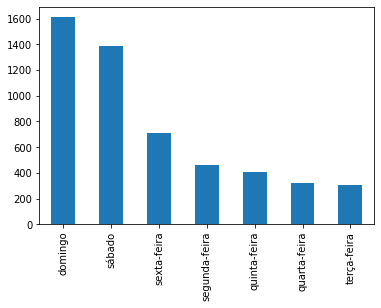

In [75]:
df_tmp = df[df['causa_acidente'] == 'Ingestão de Álcool']
df_tmp['dia_semana'].value_counts().plot.bar()

**Item 14**  
- Apresente um gráfico que mostre a quantidade de acidentes de acordo com a condição meteorológica, subdividida de acordo com a fase do dia.
- Explique o resultado obtido.

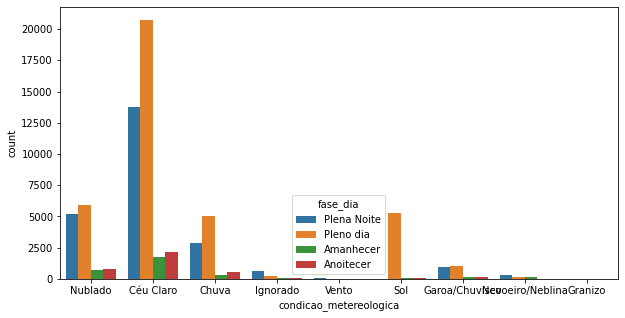

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(x='condicao_metereologica', hue='fase_dia', data=df)
plt.show()

**Item 15**  
- Faça uma análise utilizando algum critério próprio e explique o resultado obtido.